# FASHION CLASS CLASSIFICATION 

# PROBLEM STATEMENT

Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes. 

The 10 classes are as follows:  
0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. 


# IMPORT LIBRARIES AND DATA  

In [6]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [7]:
#import data
fashion_train = pd.read_csv('fashion-mnist_train.csv',sep=',')
fashion_test = pd.read_csv('fashion-mnist_test.csv', sep = ',')

# VISUALISE DATASET

In [8]:
#view first few rows of training dataset
fashion_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#view last few rows of training dataset
fashion_train.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#view first few rows of testing dataset
fashion_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#view last few rows of testing dataset
fashion_test.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [12]:
#check shape of training and testing data
fashion_train.shape

(60000, 785)

In [13]:
fashion_test.shape

(10000, 785)

In [14]:
#create arrays out of training and testing datasets
training = np.array(fashion_train,dtype='int32')
testing=np.array(fashion_test,dtype='int32')

In [15]:
training

array([[2, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       ...,
       [8, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0]])

In [16]:
testing

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       ...,
       [8, 0, 0, ..., 0, 1, 0],
       [8, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

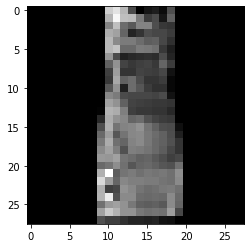

In [17]:
# view a random image!
i = random.randint(1,60000) # select any random index from 1 to 60,000
plt.imshow( training[i,1:].reshape((28,28)) ) # reshape and plot the image

plt.imshow( training[i,1:].reshape((28,28)) , cmap = 'gray') # reshape and plot the image


# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot


In [18]:
#check the label of the above image
label = training[i,0]
label

3

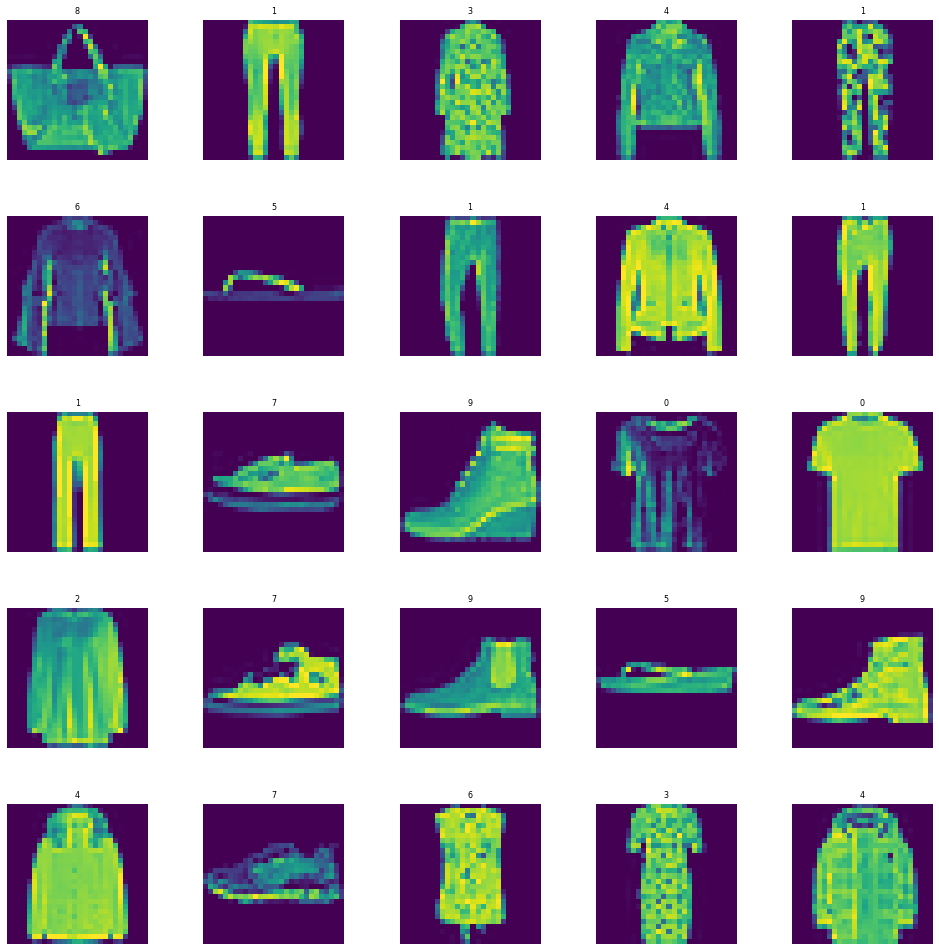

In [19]:
# view more then one image in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot
        

# FEATURE SCALING

In [20]:
X_train = training[:,1:]/255
y_train = training[:,0]

In [21]:
X_test = testing[:,1:]/255
y_test = testing[:,0]

# TRAIN_TEST SPLITTING

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=0)


In [23]:
X_train.shape

(48000, 784)

In [24]:
X_val.shape

(12000, 784)

In [25]:
y_train.shape

(48000,)

In [26]:
y_val.shape

(12000,)

# RESHAPING THE DATA

In [27]:
#reshape the data back to 28*28 pixels image
X_train = X_train.reshape(X_train.shape[0], *(28,28,1))
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))
X_val = X_val.reshape(X_val.shape[0], *(28,28,1))

In [28]:
X_train.shape

(48000, 28, 28, 1)

In [29]:
X_test.shape

(10000, 28, 28, 1)

In [30]:
X_val.shape

(12000, 28, 28, 1)

# CNN CONSTRUCTION

# IMPORT CNN LIBRARIES

In [31]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard


# INITIALIZING CNN

In [34]:
cnn_model = Sequential()

In [35]:
# 32 fliters convolutional layer
cnn_model.add(Conv2D(32,3, 3, input_shape = (28,28,1), activation='relu'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  


# MAXPOOLING

In [36]:
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

In [37]:
#dropout regularization with droping rate of neurons as 25%
cnn_model.add(Dropout(0.25))

# FLATTENING

In [38]:
cnn_model.add(Flatten())

# FULL CONNECTON

In [39]:
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  


# COMPILING CNN

In [40]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

# FITTING TRAINING DATA

In [42]:
epochs = 50

history = cnn_model.fit(X_train,
                        y_train,
                        batch_size = 512,
                        nb_epoch = epochs,
                        verbose = 1,
                        validation_data = (X_val, y_val))



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 31s 647us/step - loss: 0.9497 - accuracy: 0.6771 - val_loss: 0.5301 - val_accuracy: 0.8122
Epoch 2/50
48000/48000 [==============================] - 27s 565us/step - loss: 0.4687 - accuracy: 0.8314 - val_loss: 0.4286 - val_accuracy: 0.8447
Epoch 3/50
48000/48000 [==============================] - 26s 550us/step - loss: 0.4063 - accuracy: 0.8573 - val_loss: 0.3736 - val_accuracy: 0.8712
Epoch 4/50
48000/48000 [==============================] - 28s 592us/step - loss: 0.3735 - accuracy: 0.8678 - val_loss: 0.3475 - val_accuracy: 0.8788
Epoch 5/50
48000/48000 [==============================] - 28s 574us/step - loss: 0.3519 - accuracy: 0.8748 - val_loss: 0.3554 - val_accuracy: 0.8724
Epoch 6/50
48000/48000 [==============================] - 27s 568us/step - loss: 0.3324 - accuracy: 0.8831 - val_loss: 0.3226 - val_accuracy: 0.8892
Epoch 7/50
48000/48000 [==============================] 

# PREDICTIONS FOR TEST DATA

In [43]:
y_pred = cnn_model.predict_classes(X_test)
y_pred

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

# VISUALIZING RESULTS

In [44]:
y_pred

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

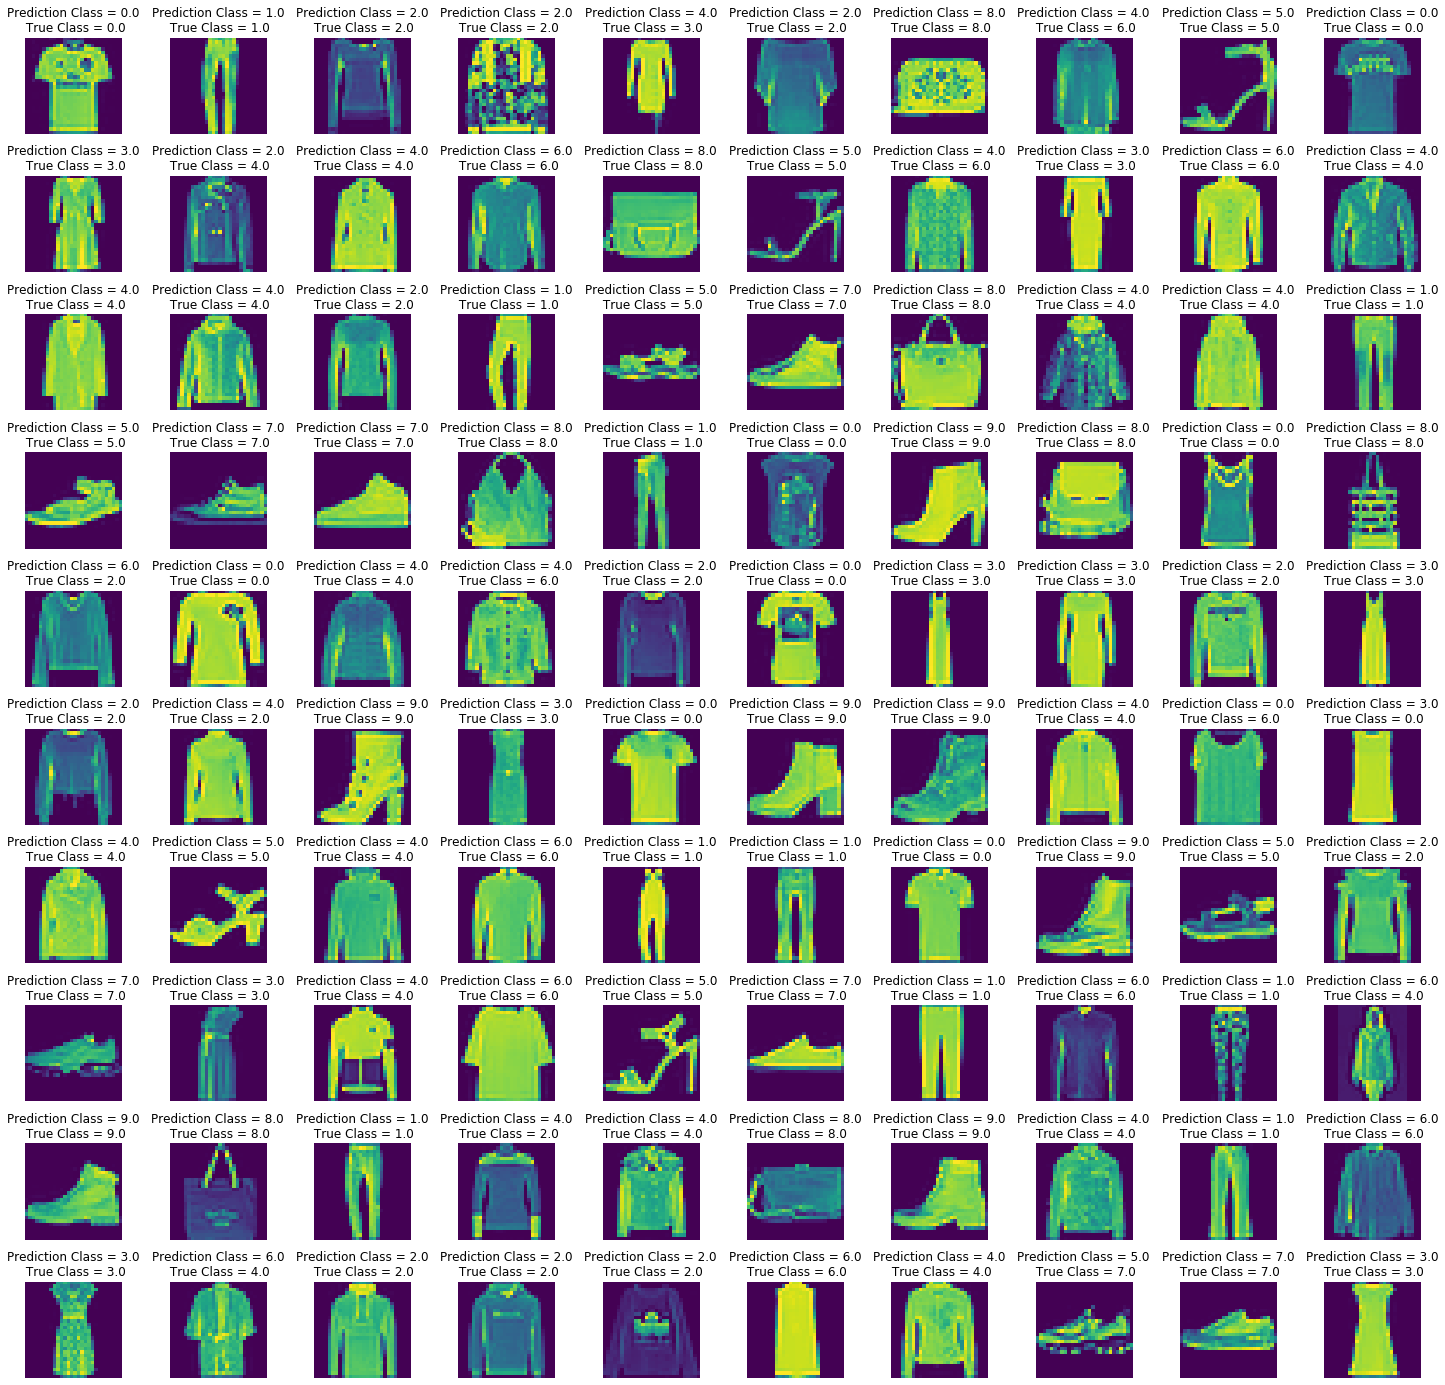

In [49]:
#plotting images of 225 test cases
L = 10
W = 10
fig, axes = plt.subplots(L, W, figsize = (25,25))
axes = axes.ravel() 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(y_pred[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)


# MODEL EVALUATION 

In [50]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 2s 166us/step
Test Accuracy : 0.916


# PLOTTING CONFUSION MATRIX

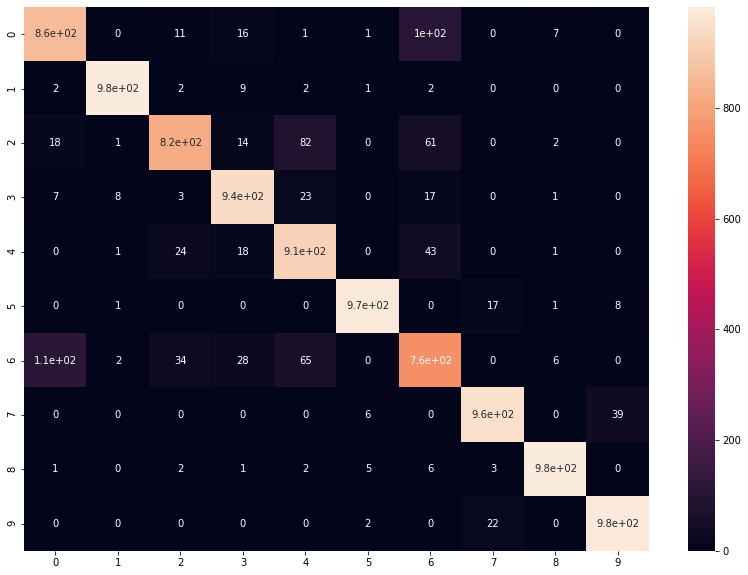

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)
# Sum the diagonal element to get the total true correct values

# CLASSIFICATION REPORT

In [53]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, y_pred, target_names = target_names))
# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

              precision    recall  f1-score   support

     Class 0       0.86      0.86      0.86      1000
     Class 1       0.99      0.98      0.98      1000
     Class 2       0.92      0.82      0.87      1000
     Class 3       0.92      0.94      0.93      1000
     Class 4       0.84      0.91      0.87      1000
     Class 5       0.98      0.97      0.98      1000
     Class 6       0.76      0.76      0.76      1000
     Class 7       0.96      0.95      0.96      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.95      0.98      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



# CONCLUSION

The above CNN model classifies fashion objects with an accuracy of 92%. The only objects which have an accuracy below 90% are class 0, class 4, class 6. These are T-shirt, coat and shirt which are quite difficult to classify among themselves. The model can be furthur improved by adding more feature detector layers (say 64), using various dropout rates, add more convolution layers.